In [114]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from datetime import date, time, datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

**Load the excel file from google drive into the variable "df"**

In [67]:
from google.colab import drive
drive.mount('/content/drive')
print ("\nOnce google drive is mounted and correct file path is provided below,")
print ("it takes about 40 seconds to read the excel file from drive")
df = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx") # Takes about 40 seconds to read the file from drive
#df_copy = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")

# Rename No-show to NoShow
df = df.rename(columns={"No-show":"NoShow"})

#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()

# Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value
print ("\nCheck for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value")
print(df.info())
print(df.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Once google drive is mounted and correct file path is provided below,
it takes about 40 seconds to read the excel file from drive

Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 

# Feature Engineering

**Determine the frequency of distinct values in each feature set**

In [68]:
# Print overall unique possible columns
for column in df.iloc[:,np.r_[2,5,6,7,8,9,10,11,12,13]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

# Number of unique elements.
print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# Numerical features
numerical_features = ["PatientId","AppointmentID","ScheduledDay","AppointmentDay","Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
# Categorical features
categorical_features = ["Gender","Neighbourhood","NoShow"]

# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    #print(sorted(df[a].unique()))
    print(df[a].value_counts())

print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

# Getting number of unique elements in each column.
print("Unique # of PatientId: ")
print (len(df['PatientId'].unique()))
print("Unique # of  AppointmentID: ")
print (len(df['AppointmentID'].unique()))
print("Unique # of  Gender: ")
print (len(df['Gender'].unique()))
print("Unique # of  ScheduledDay: ")
print (len(df['ScheduledDay'].unique()))
print("Unique # of  Age: ")
print (len(df['Age'].unique()))
print("Unique # of  Neighbourhood: ")
print (len(df['Neighbourhood'].unique()))
print("Unique # of  Scholarship: ")
print (len(df['Scholarship'].unique()))
print("Unique # of  Hipertension: ")
print (len(df['Hipertension'].unique()))
print("Unique # of  Diabetes: ")
print (len(df['Diabetes'].unique()))
print("Unique # of  Alcoholism: ")
print (len(df['Alcoholism'].unique()))
print("Unique # of  Handcap: ")
print (len(df['Handcap'].unique()))
print("Unique # of  SMS_received: ")
print (len(df['SMS_received'].unique()))
print("Unique # of  NoShow: ")
print (len(df['NoShow'].unique()))    

Gender:
['F' 'M']
Age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÃšBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃƒO PEDRO' 'SANTA MARTHA'
 'SÃƒO CRISTÃ“VÃƒO' 'MARUÃ\x8dPE' 'GRANDE VITÃ“RIA' 'SÃƒO BENEDITO'
 'ILHA DAS CAIEIRAS' 'SANTO ANDRÃ‰' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÃ”NIO HONÃ“RIO'
 'RESISTÃŠNCIA' 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MONTE BELO'
 'MÃ\x81RIO CYPRESTE' 'SANTO ANTÃ”NIO' 'BELA VISTA' 'PRAIA DO SUÃ\x81'
 'SANTA HELENA' 'ITA

In [69]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


**Count the frequency of negative Age feature observations, and remove them**

In [70]:
print("Before removing the negative age")
print("--------------------------------")
print( df['Age'].value_counts() )
# Get names of indexes for which column Age has value less than 0
a = df.index[df['Age'] < 0]
print (a)
df = df.drop(index=a)
print("\nAfter removing the negative age")
print("--------------------------------")
print( df['Age'].value_counts() )
# After removing the negative age row, the count is now 110526 rows. Previously it was 110527 rows

Before removing the negative age
--------------------------------
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
Int64Index([99832], dtype='int64')

After removing the negative age
--------------------------------
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


**ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code**

In [71]:
# Using laberl encoder to convert non-numeric data into numberic data
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender) #F=0, M=1
df.Neighbourhood = le.fit_transform(df.Neighbourhood) # Starts from 0. Goes upto 80
df.NoShow = le.fit_transform(df.NoShow) #No=0, Yes=1

In [72]:
# After label encoding
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


**Break the date features into date components. WaitingTime = Appointimet - Scheduled. IF the waiting times are negative, take the abs. To do this, I made the appointment and scheduled times as datetime64 formats. Other ways explored is to break the dates in month, day, year and then take the difference of the days. Also, since the times in appointment day are 00:00:00, make it 23:59:59 to adjust the appointmentday times**

In [73]:
print ("df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type")
print ("----------------------------------------------------------------------------------")
print(df.dtypes)
df['ScheduledDay'] = df['ScheduledDay'].astype('string')
df['AppointmentDay'] = df['AppointmentDay'].astype('string')
print ("\ndf.dtypes prior to changing the ScheduledDay and AppointmentDay to string type")
print ("----------------------------------------------------------------------------------")
print(df.dtypes)

# Code to remove the T and Z characters after changing the ScheduledDay and AppointmentDay to string type
for index, row in df.iterrows():
  temp = df['AppointmentDay'][index]
  temp = df['AppointmentDay'][index].replace('T',' ').replace('Z','')
  df['AppointmentDay'][index] = temp
  temp2 = df['ScheduledDay'][index]
  temp2 = df['ScheduledDay'][index].replace('T',' ').replace('Z','')
  df['ScheduledDay'][index] = temp2

print ("\nT and Z characters removed from ScheduledDay and AppointmentDay")
print ("-----------------------------------------------------------------")

# change ScheduledDay and AppointmentDay to datetime64 format
print ("\nNow, change ScheduledDay and AppointmentDay to datetime64 format")
print ("-----------------------------------------------------------------")
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])

print(df.dtypes)

# To get the difference of scheduled and appointment days is to just take the difference and take abs.
print ("\nAdd a new column of WaitingTime. It will be the difference (in days) of ScheduledDay and AppointmentDay")
print ("---------------------------------------------------------------------------------------------------------")
df['WaitingTime'] = (abs(df['AppointmentDay'] - df['ScheduledDay']))/np.timedelta64(1,'D')

# Check for the appointments that were scheduled after the appointment datetimes.
# Around 38567 appointments that were scheduled after the appointment datetimes
(df['ScheduledDay']>df['AppointmentDay']).sum()

# appointment times were set at the earliest time (00:00:00) whereas the times are included in ScheduledDay
# shift all the appointment times to  23:59:59.
# More information at https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
df['AppointmentDay'] = df['AppointmentDay'] +pd.Timedelta('1d') - pd.Timedelta('1s')

# Now after the adjustment, Check for the appointments that were scheduled after the appointment datetimes.
# Around 5 appointments that were scheduled after the appointment datetimes. Remove them from the data.
(df['ScheduledDay']>df['AppointmentDay']).sum()

df = df.loc[(df['ScheduledDay'] <= df['AppointmentDay'])].copy()

# Individual columns for day, month, week and year for schedule and appointment day columns.
df['ScheduledDay_yr'] = df['ScheduledDay'].dt.year.astype(int)
df['AppointmentDay_yr'] = df['AppointmentDay'].dt.year.astype(int)
df['ScheduledDay_mnth'] = df['ScheduledDay'].dt.month.astype(int)
df['AppointmentDay_mnth'] = df['AppointmentDay'].dt.month.astype(int)
df['ScheduledDay_week'] = df['ScheduledDay'].dt.isocalendar().week.astype(int)
df['AppointmentDay_week'] = df['AppointmentDay'].dt.isocalendar().week.astype(int)
df['ScheduledDay_day'] = df['ScheduledDay'].dt.day.astype(int)
df['AppointmentDay_day'] = df['AppointmentDay'].dt.day.astype(int)
df['ScheduledDay_hr'] = df['ScheduledDay'].dt.hour.astype(int)
df['AppointmentDay_hr'] = df['AppointmentDay'].dt.hour.astype(int)
df['ScheduledDay_min'] = df['ScheduledDay'].dt.minute.astype(int)
df['AppointmentDay_min'] = df['AppointmentDay'].dt.minute.astype(int)
df['ScheduledDay_weekday'] = df['ScheduledDay'].dt.dayofweek.astype(int)
df['AppointmentDay_weekday'] = df['AppointmentDay'].dt.dayofweek.astype(int)

# Create schedule to appointment number of days 'schd_to_appt_days_diff' column
df['schd_to_appt_days_diff'] = (df.AppointmentDay - df.ScheduledDay).dt.days

# Check if there is any error...negative difference between scheduled and appointment days
# Find the number of rows where this error occured
print("Negative difference between scheduled and appointment days: ", df['schd_to_appt_days_diff'].lt(0).sum())
print("---------------------------------------------------------- ")

df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type
----------------------------------------------------------------------------------
PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
NoShow              int64
dtype: object

df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type
----------------------------------------------------------------------------------
PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       string
AppointmentDay     string
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap    

In [74]:
# Print overall unique possible columns
for column in df.iloc[:,np.r_[1,2,5:29]].columns:
    print("{}:\n{}".format(column,df[column].unique()))


AppointmentID:
[5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender:
[0 1]
Age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]
Neighbourhood:
[39 45 54 58 25  1 12 50 15 78  6 77 66 75 44 26 74 29 68 73  8 38 43 37
  2 59 30 42 46 48 69  5 56 63 36 35 79 76 57 62 10 52 18 70  9  3 32 27
 41 13 55  7 47 64 65  4 21 23 22 20 71 53 40 67 14 33 60 11 61 80 16 19
 17 28 72 31 24 49  0 34 51]
Scholarship:
[0 1]
Hipertension:
[1 0]
Diabetes:
[0 1]
Alcoholism:
[0 1]
Handcap:
[0 1 2 3 4]
SMS_received:
[0 1]
NoShow:
[0 1]
WaitingTime:
[ 0.77648148  0.67253472  0.67990741 ... 40.33064815 40.3684838
 40.43685185]
ScheduledDa

In [75]:
# Check the percentage of NoShow = 1
# sum all the elements of the NoShow column. 0s(NoShow=no) won't contribute to this as 1+0=1
# percentageNoShowYes:  0.20. This means probability of 1/5.
# 1 in 5 patients will miss the scheduled appointments.

percentageNoShowYes=sum(df['NoShow'])/len(df['NoShow'])
print ("percentageNoShowYes: ", percentageNoShowYes)

percentageNoShowYes:  0.2018982817745044


**Plot graphs to get some more relation between various independent variables and dependent variable NoShow**

In [76]:
noshow = df.NoShow == 1
show = df.NoShow == 0

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 <a list of 111 Text major ticklabel objects>)

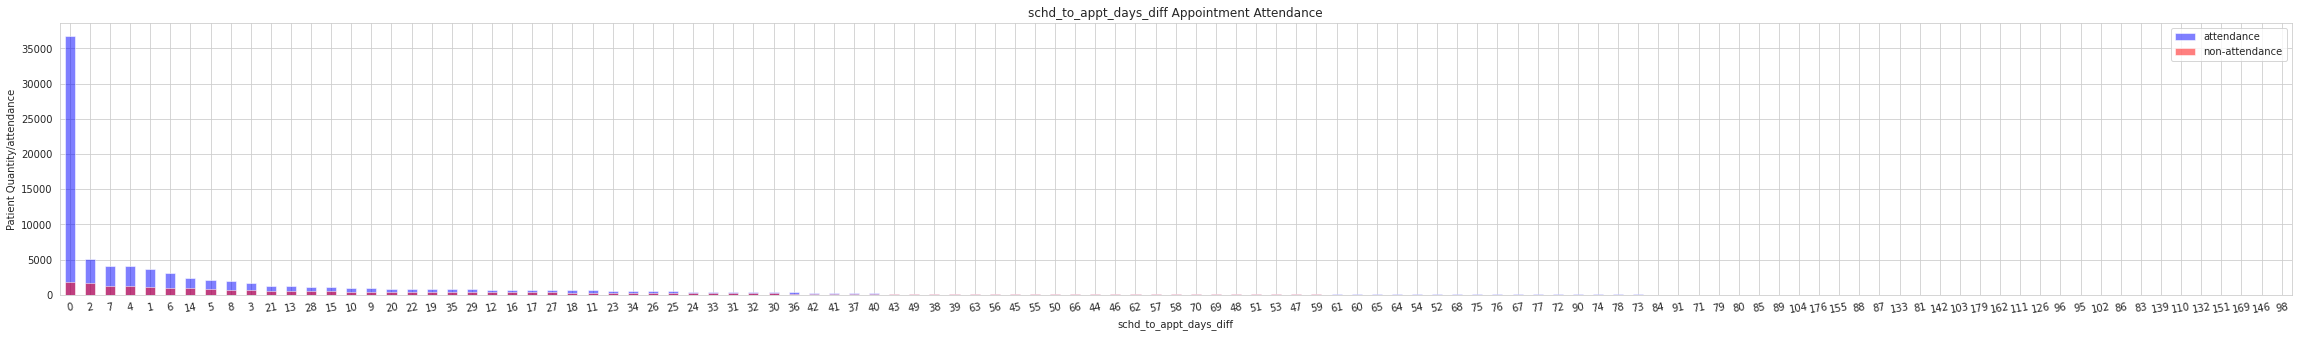

In [77]:
# More people showed up on appointments when the delta of appointment and scheduled day is less.
fig = plt.figure(figsize = (40,5))
df.schd_to_appt_days_diff[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df.schd_to_appt_days_diff[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('schd_to_appt_days_diff Appointment Attendance')
plt.xlabel('schd_to_appt_days_diff')
plt.ylabel('Patient Quantity/attendance')
plt.xticks(rotation=10)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

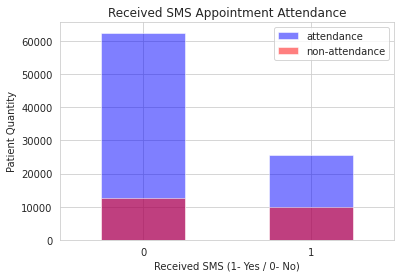

In [78]:
# People who didn't receive SMS show up more on their appointments
df.SMS_received[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Received SMS Appointment Attendance')
plt.xlabel('Received SMS (1- Yes / 0- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

**Check for Outliers Using Box plots**

Text(0.5, 0, 'Age ')

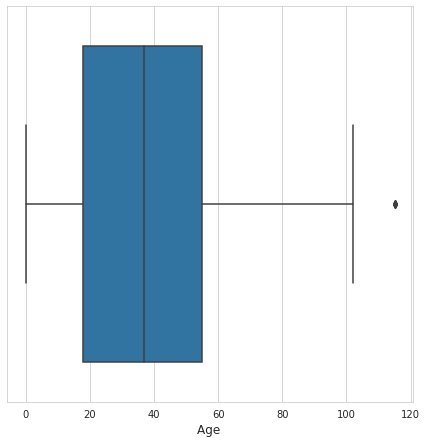

In [79]:
# Check and focus on Age
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age ', fontsize = 12)

In [80]:
# Check the shape
print ("Shape of the dataframe prior to removig the Age outliers")
print ("--------------------------------------------------------")
print(df.shape)
# Identify the outliers in Age.
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print("Lower_Whisker, Upper_Whisker: ", Lower_Whisker, Upper_Whisker)
df = df[df['Age']< Upper_Whisker]
# Check the shape
print ("Shape of the dataframe After to removig the Age outliers")
print ("---------------------------------------------------------")
print(df.shape)

Shape of the dataframe prior to removig the Age outliers
--------------------------------------------------------
(110521, 30)
Q1:  18.0
Q3:  55.0
IQR:  37.0
Lower_Whisker, Upper_Whisker:  -37.5 110.5
Shape of the dataframe After to removig the Age outliers
---------------------------------------------------------
(110516, 30)


Text(0.5, 0, 'Age with Outliers Removed ')

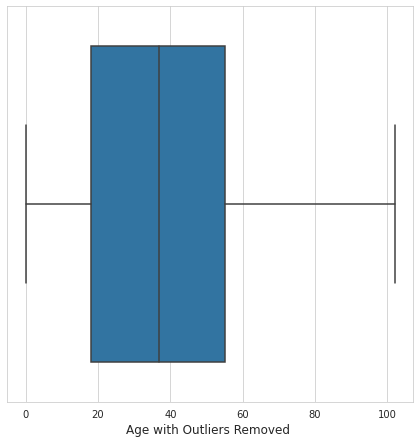

In [81]:
# After removing the Age outliers
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age with Outliers Removed ', fontsize = 12)

**Earlier, we determined the frequency of distinct values in each feature set. Observed that Handicap has most values in 0s with rest in 1 2 3 and 4. Consider them as outliers. Replace Handcap of 2,3,4 as Handcap 1.**

In [82]:
# Numerical features
numerical_features = ["Handcap"]


# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": Before ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Handicap =1 will have same effect as Handicap = 2, 3 or 4. 
# To make the analysis better, we only take two values for the Handicap column
# Handicap = 0 or 1.
print ("\nHandicap =1 will have same effect as Handicap = 2, 3 or 4. Change 2,3,4 to 1\n")
df["Handcap"].replace({2:1, 3:1, 4:1}, inplace=True)

# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": After ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

print("\nUnique # of elements in Handcap: ", df.Handcap.unique())

------------------numerical_feature----------------------Handcap: Before 
0    108281
1      2036
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handicap =1 will have same effect as Handicap = 2, 3 or 4. Change 2,3,4 to 1

------------------numerical_feature----------------------Handcap: After 
0    108281
1      2235
Name: Handcap, dtype: int64

Unique # of elements in Handcap:  [0 1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16c319e10>]],
      dtype=object)

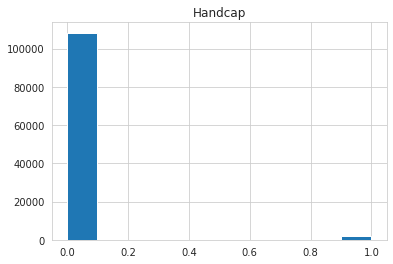

In [83]:
df.hist(column='Handcap')
# Handcap had skewed distribution
# Replaced 1s, 2s, 3s, and 4s with 1s

**Standardization**

In [84]:
# Normalization 
# The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
#columns_to_standardize = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']
columns_to_standardize = ['Age']
df[columns_to_standardize] = MinMaxScaler().fit_transform(df[columns_to_standardize])

**Conduct variability comparison between features using a correlation matrix & drop correlated features**

In [85]:
CleanDF_correlation = df.filter(['PatientId','Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','schd_to_appt_days_diff','ScheduledDay_yr','ScheduledDay_mnth','AppointmentDay_mnth','ScheduledDay_week','AppointmentDay_week','ScheduledDay_day','AppointmentDay_day','ScheduledDay_hr','ScheduledDay_weekday','AppointmentDay_weekday','ScheduledDay_min','NoShow'], axis=1)
# All of them numeric i.e. int/float
print(CleanDF_correlation.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 0 to 110526
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   PatientId               110516 non-null  float64
 1   Gender                  110516 non-null  int64  
 2   Age                     110516 non-null  float64
 3   Neighbourhood           110516 non-null  int64  
 4   Scholarship             110516 non-null  int64  
 5   Hipertension            110516 non-null  int64  
 6   Diabetes                110516 non-null  int64  
 7   Alcoholism              110516 non-null  int64  
 8   Handcap                 110516 non-null  int64  
 9   SMS_received            110516 non-null  int64  
 10  WaitingTime             110516 non-null  float64
 11  schd_to_appt_days_diff  110516 non-null  int64  
 12  ScheduledDay_yr         110516 non-null  int64  
 13  ScheduledDay_mnth       110516 non-null  int64  
 14  AppointmentDay_mnth 

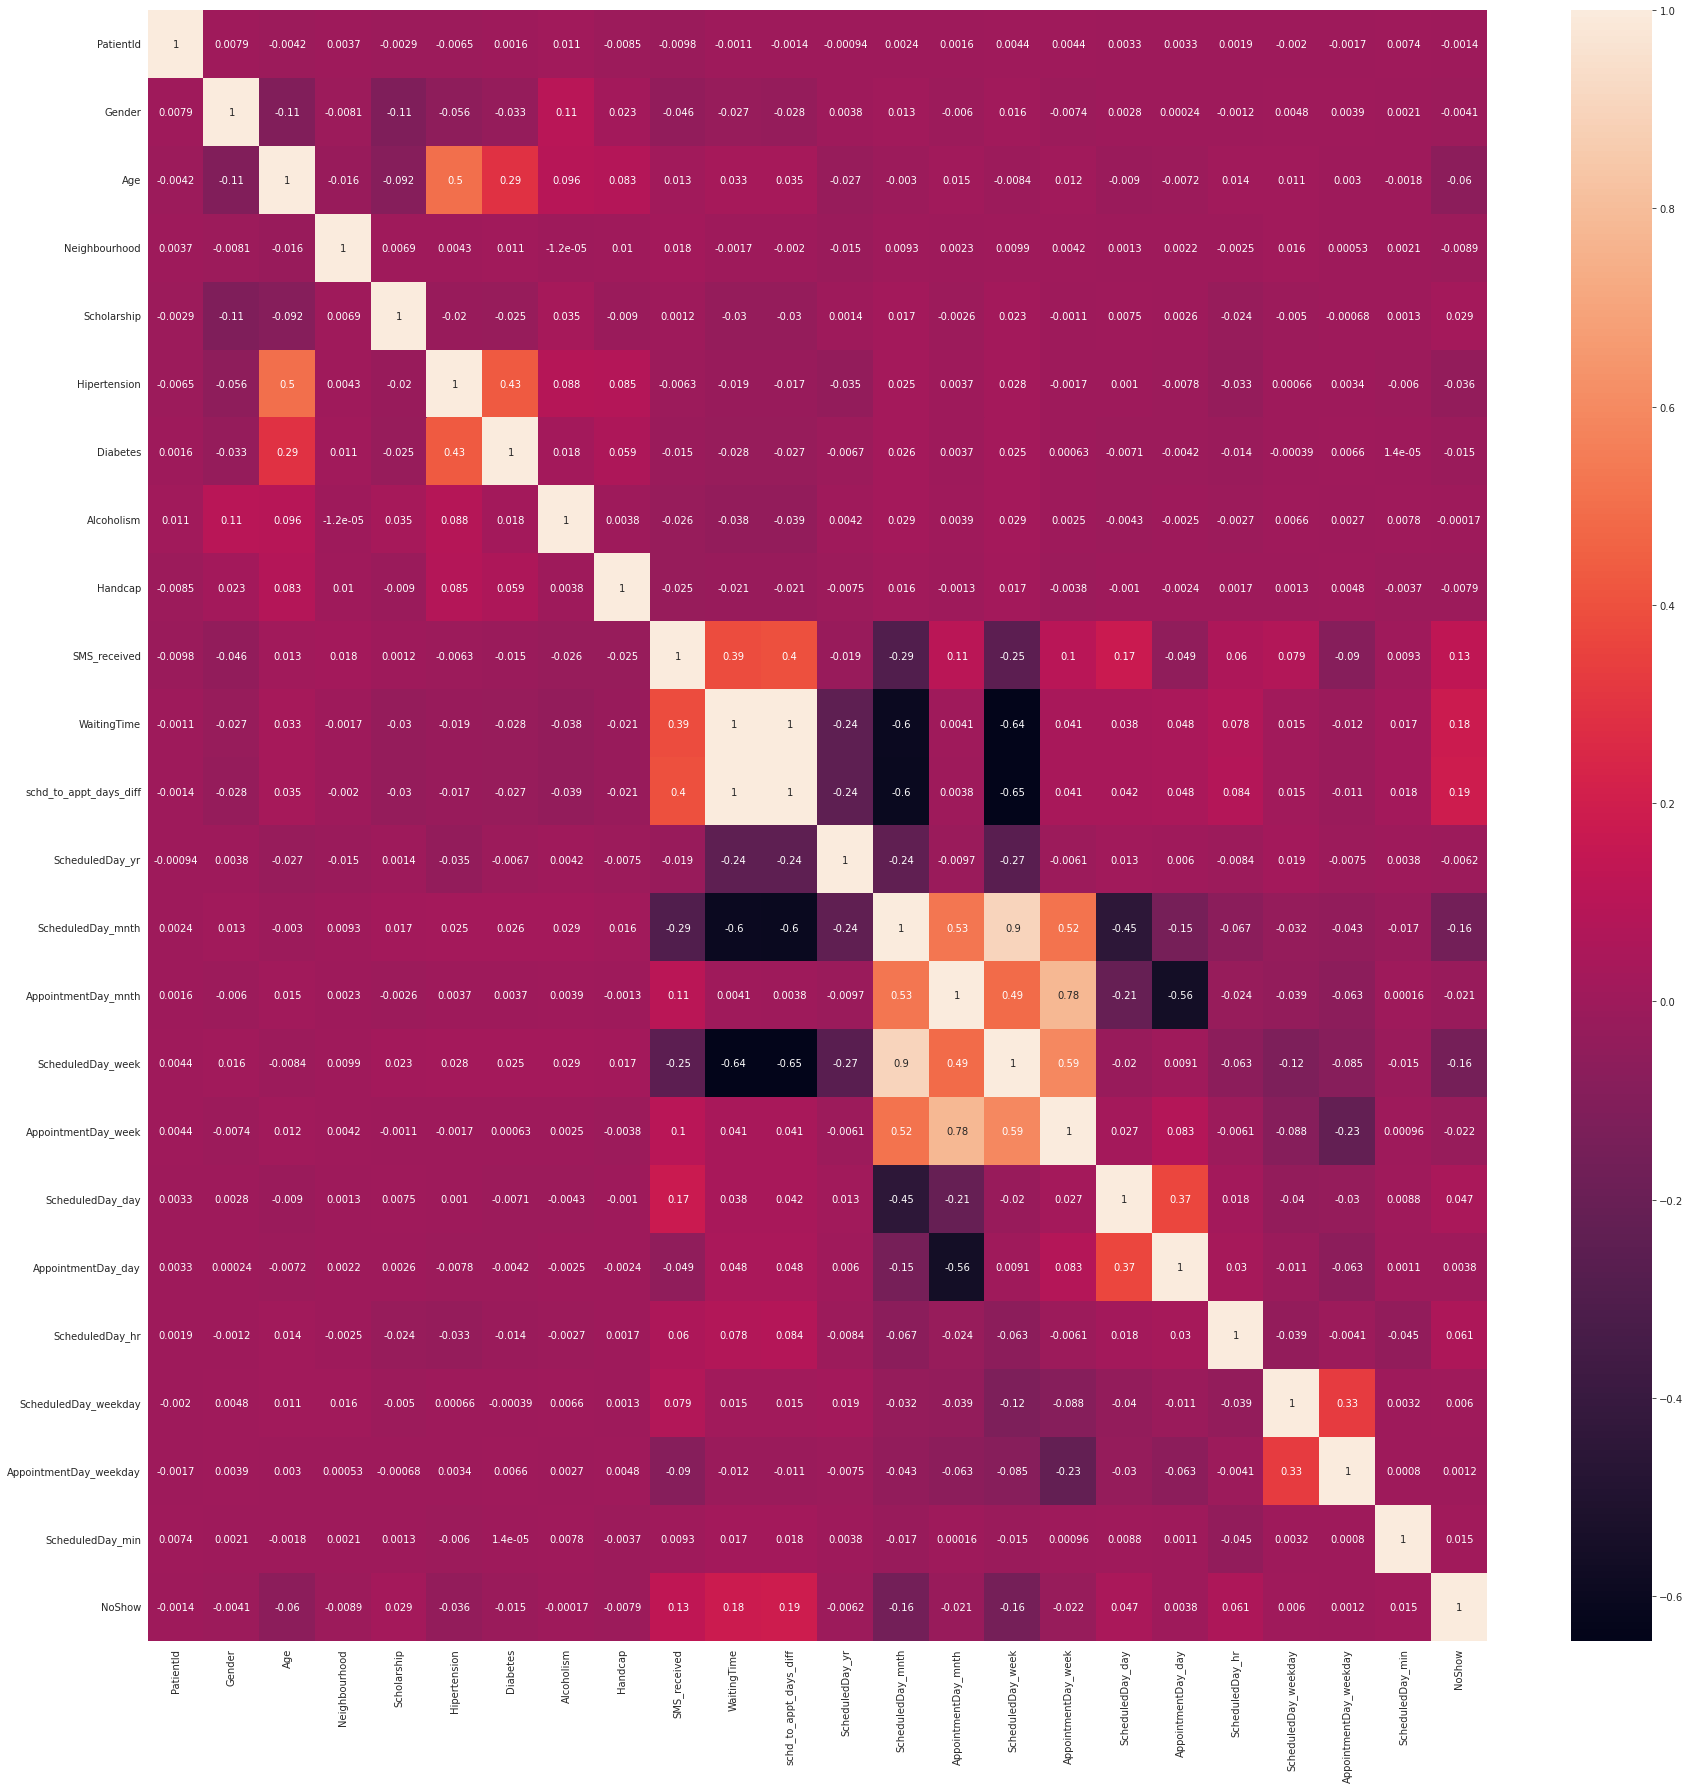

In [86]:
fig, ax = plt.subplots(figsize=(30,30))
corrmat=CleanDF_correlation.corr()
sns.heatmap(corrmat, annot=True)

# Model Development

**Develop a Naïve Bayes classifier to predict the outcome of the test using Python. The performance of the classifier should be evaluated by partitioning the dataset into a train dataset (70%) and test dataset (30%). Use the train dataset to build the Naïve Bayes and the test dataset to evaluate how well the model generalizes to future results.**

In [87]:
CleanDF_correlation

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,schd_to_appt_days_diff,ScheduledDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,ScheduledDay_weekday,AppointmentDay_weekday,ScheduledDay_min,NoShow
0,2.987250e+13,0,0.607843,39,0,1,0,0,0,0,0.776481,0,2016,4,4,17,17,29,29,18,4,4,38,0
1,5.589978e+14,1,0.549020,39,0,0,0,0,0,0,0.672535,0,2016,4,4,17,17,29,29,16,4,4,8,0
2,4.262962e+12,0,0.607843,45,0,0,0,0,0,0,0.679907,0,2016,4,4,17,17,29,29,16,4,4,19,0
3,8.679512e+11,0,0.078431,54,0,0,0,0,0,0,0.728831,0,2016,4,4,17,17,29,29,17,4,4,29,0
4,8.841186e+12,0,0.549020,39,0,1,1,0,0,0,0.671794,0,2016,4,4,17,17,29,29,16,4,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,0,0.549020,43,0,0,0,0,0,1,34.614178,35,2016,5,6,18,23,3,7,9,1,1,15,0
110523,3.596266e+12,0,0.500000,43,0,0,0,0,0,1,34.689201,35,2016,5,6,18,23,3,7,7,1,1,27,0
110524,1.557663e+13,0,0.205882,43,0,0,0,0,0,1,40.330648,41,2016,4,6,17,23,27,7,16,2,1,3,0
110525,9.213493e+13,0,0.372549,43,0,0,0,0,0,1,40.368484,41,2016,4,6,17,23,27,7,15,2,1,9,0


In [88]:
#X_CleanDF_correlation=CleanDF_correlation.filter(['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','WaitingTime','schd_to_appt_days_diff','ScheduledDay_yr','ScheduledDay_mnth','AppointmentDay_mnth','ScheduledDay_week','AppointmentDay_week','ScheduledDay_day','AppointmentDay_day','ScheduledDay_hr','ScheduledDay_weekday','AppointmentDay_weekday','ScheduledDay_min'], axis=1)
X_CleanDF_correlation=CleanDF_correlation.filter(['SMS_received','schd_to_appt_days_diff'], axis=1)
Y_CleanDF_correlation=CleanDF_correlation.filter(['NoShow'], axis=1)



**Split the Data Frame into X and y**

TRAIN TEST SPLIT
Train: 70%, Test: 30%

In [103]:
X_train, X_test, y_train, y_test= train_test_split(X_CleanDF_correlation,Y_CleanDF_correlation,test_size=0.3,random_state=0)#splitting data in 70% train, 30%test

In [104]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

**Naive Bayes** is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [128]:
MultinomialNB_classifier = MultinomialNB()
MultinomialNB_classifier.fit(X_train, y_train)
y_pred_MultinomialNB_classifier = MultinomialNB_classifier.predict(X_test)

<>================================================================================================<>
<>==============================MultinomialNB_classifier RESULTS: ================================<>
<>================================================================================================<>

<>-----The 5 fold MultinomialNB_classifier_Score cross validation: ----------<>
[0.79725974 0.79731127 0.79731127 0.79724664 0.79724664]

<>-----MultinomialNB_classifier_Score Mean and Standard Deviation: ----------<>
0.7972751129816082 2.9908907734795153e-05

<>-----MultinomialNB_classifier confusion_matrix: ---------------------------<>
[[26527     0]
 [ 6628     0]]

<>-----MultinomialNB_classifier accuracy: -----------------------------------<>
0.8000904840898808

<>-----MultinomialNB_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26527
           1       0.00      0.00 

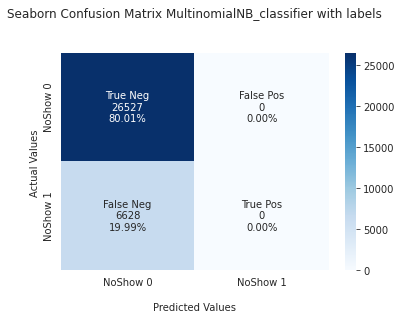

In [149]:
print("<>================================================================================================<>")
print("<>==============================MultinomialNB_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_MultinomialNB_classifier = confusion_matrix(y_test, y_pred_MultinomialNB_classifier)
accuracy_MultinomialNB_classifier = accuracy_score(y_test, y_pred_MultinomialNB_classifier)
# cross_val_score
MultinomialNB_classifier_Score = cross_val_score(MultinomialNB_classifier, X_train, y_train, cv=5)
print("\n<>-----The 5 fold MultinomialNB_classifier_Score cross validation: ----------<>")
print(MultinomialNB_classifier_Score)
# Getting mean
print("\n<>-----MultinomialNB_classifier_Score Mean and Standard Deviation: ----------<>")
print(MultinomialNB_classifier_Score.mean(), MultinomialNB_classifier_Score.std())
print("\n<>-----MultinomialNB_classifier confusion_matrix: ---------------------------<>")
print(cm_MultinomialNB_classifier)
print("\n<>-----MultinomialNB_classifier accuracy: -----------------------------------<>")
print(accuracy_MultinomialNB_classifier)
print("\n<>-----MultinomialNB_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_MultinomialNB_classifier))
print("\n<>-----MultinomialNB_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_MultinomialNB_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_MultinomialNB_classifier.flatten()/np.sum(cm_MultinomialNB_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_MultinomialNB_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix MultinomialNB_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()



In [150]:
# Tune the model using GridSearchCV
# Grid search only performed on the training set.
print("<>================================================================================================<>")
print("<>==================== MultinomialNB_classifier RESULTS with GridSearchCV: =======================<>")
print("<>================================================================================================<>")
print("\n<>----------- MultinomialNB_classifier.get_params-----------------------------<>")
print(MultinomialNB_classifier.get_params())
params = {'alpha': [0.5, 1.0, 10.0],'fit_prior': [True, False]}
MultinomialNB_classifier_grid=GridSearchCV(MultinomialNB_classifier, param_grid=params, n_jobs=-1, cv=2, verbose=5)
MultinomialNB_classifier_grid.fit(X_train, y_train)
print("\n<>----------- MultinomialNB_classifier_grid.cv_results_-----------------------<>")
print(MultinomialNB_classifier_grid.cv_results_)
MultinomialNB_classifier_grid_df = pd.DataFrame(MultinomialNB_classifier_grid.cv_results_)
print("\n<>----------- MultinomialNB_classifier_grid.cv_results_ as dataframe----------<>")
MultinomialNB_classifier_grid_df

<>================================================================================================<>
<>==================== MultinomialNB_classifier RESULTS with GridSearchCV: =======================<>
<>================================================================================================<>

<>----------- MultinomialNB_classifier.get_params-----------------------------<>
{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
Fitting 2 folds for each of 6 candidates, totalling 12 fits

<>----------- MultinomialNB_classifier_grid.cv_results_-----------------------<>
{'mean_fit_time': array([0.01621044, 0.02203965, 0.01520729, 0.01950336, 0.01504564,
       0.01480699]), 'std_fit_time': array([0.00026834, 0.0069263 , 0.00014448, 0.00264096, 0.00024509,
       0.00055242]), 'mean_score_time': array([0.00918019, 0.00962996, 0.00897121, 0.01399696, 0.00900495,
       0.00833213]), 'std_score_time': array([4.27961349e-05, 3.86953354e-04, 4.32729721e-04, 4.34315205e-03,
       1.102

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_prior,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016210,0.000268,0.009180,0.000043,0.5,True,"{'alpha': 0.5, 'fit_prior': True}",0.797265,0.797285,0.797275,0.000010,1
1,0.022040,0.006926,0.009630,0.000387,0.5,False,"{'alpha': 0.5, 'fit_prior': False}",0.640495,0.642063,0.641279,0.000784,4
2,0.015207,0.000144,0.008971,0.000433,1.0,True,"{'alpha': 1.0, 'fit_prior': True}",0.797265,0.797285,0.797275,0.000010,1
3,0.019503,0.002641,0.013997,0.004343,1.0,False,"{'alpha': 1.0, 'fit_prior': False}",0.640495,0.642063,0.641279,0.000784,4
4,0.015046,0.000245,0.009005,0.000110,10.0,True,"{'alpha': 10.0, 'fit_prior': True}",0.797265,0.797285,0.797275,0.000010,1
5,0.014807,0.000552,0.008332,0.000680,10.0,False,"{'alpha': 10.0, 'fit_prior': False}",0.640495,0.642063,0.641279,0.000784,4


In [131]:
# Getting number of correct predictions and percentage DELETE
correct = 0
total = 0
yTestSetNew = y_test.tolist()
multinomialNBTextClfPredictedNew = y_pred_MultinomialNB_classifier.tolist()
for result in range(len(yTestSetNew)):
    total = total + 1
    if yTestSetNew[result] == multinomialNBTextClfPredictedNew[result]:
        correct = correct + 1
print(str(correct)+" correct predictions out of "+str(total)+" for MultinomialNB")
print("The MultinomialNB percentage of the correct predictions is: "+str(correct/total))

26527 correct predictions out of 33155 for MultinomialNB
The MultinomialNB percentage of the correct predictions is: 0.8000904840898808


**Using the same data set partitioning method, evaluate the performance of a SVM and Decision tree classifier on the dataset. Compare the results of the Naïve Bayes classifier and SVM with the Decision model according to the following criteria: Accuracy, Sensitivity and Specificity. Identify the model that  performed best and worst according to each criterion.**

In [152]:
#Decision tree classifier
DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier.fit(X_train, y_train)
y_pred_DecisionTree_classifier = DecisionTree_classifier.predict(X_test)

<>================================================================================================<>
<>============================== DecisionTree_classifier RESULTS: ================================<>
<>================================================================================================<>

<>----- The 5 fold DecisionTree_classifier_Score cross validation: ----------<>
[0.79687197 0.79718201 0.79724664 0.79647104 0.79647104]

<>----- DecisionTree_classifier_Score Mean and Standard Deviation: ----------<>
0.796848540951777 0.00033323785471535975

<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>
[[26502    25]
 [ 6607    21]]

<>----- DecisionTree_classifier accuracy: -----------------------------------<>
0.7999698386367063

<>----- DecisionTree_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26527
           1       0.46      0.00  

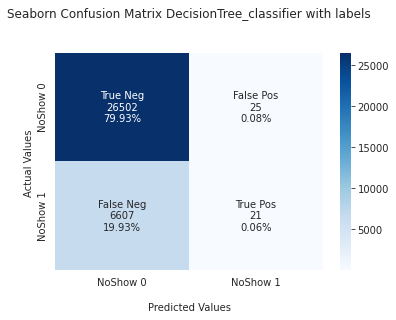

In [153]:
print("<>================================================================================================<>")
print("<>============================== DecisionTree_classifier RESULTS: ================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_DecisionTree_classifier = confusion_matrix(y_test, y_pred_DecisionTree_classifier)
accuracy_DecisionTree_classifier = accuracy_score(y_test, y_pred_DecisionTree_classifier)
# cross_val_score
DecisionTree_classifier_Score = cross_val_score(DecisionTree_classifier, X_train, y_train, cv=5)
print("\n<>----- The 5 fold DecisionTree_classifier_Score cross validation: ----------<>")
print(DecisionTree_classifier_Score)
# Getting mean
print("\n<>----- DecisionTree_classifier_Score Mean and Standard Deviation: ----------<>")
print(DecisionTree_classifier_Score.mean(), DecisionTree_classifier_Score.std())
print("\n<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_DecisionTree_classifier))
print("\n<>----- DecisionTree_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_DecisionTree_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_DecisionTree_classifier.flatten()/np.sum(cm_DecisionTree_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_DecisionTree_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix DecisionTree_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
#SVM classifier This cell takes about 30 MINUTES to complete. Please be patient.
#                                     ==========

SVM_classifier =  svm.SVC(probability=True)
SVM_classifier.fit(X_train, y_train)
y_pred_SVM_classifier = SVM_classifier.predict(X_test)
SVM_classifier_Score = cross_val_score(SVM_classifier, X_train, y_train, cv=2)

<>================================================================================================<>
<>================================= SVM_classifier RESULTS: ======================================<>
<>================================================================================================<>

<>-------------- The 2 fold SVM_classifier_Score cross validation: -------<>
[0.79726481 0.79720786]

<>----------- SVM_classifier_Score Mean and Standard Deviation: ----------<>
0.797236333185018 2.8473826176211858e-05

<>----------- SVM_classifier confusion_matrix: ---------------------------<>
[[26523     4]
 [ 6627     1]]

<>----------- SVM_classifier accuracy: -----------------------------------<>
0.8

<>----------- SVM_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26527
           1       0.20      0.00      0.00      6628

    accuracy                           0.80

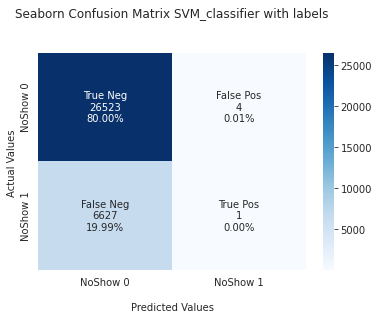

In [154]:
print("<>================================================================================================<>")
print("<>================================= SVM_classifier RESULTS: ======================================<>")
print("<>================================================================================================<>")
# confusion matrix
# pass truth and prediction in cm function 
# confusion_matrix(truth, prediction)
cm_SVM_classifier = confusion_matrix(y_test, y_pred_SVM_classifier)
accuracy_SVM_classifier = accuracy_score(y_test, y_pred_SVM_classifier)
# cross_val_score
print("\n<>-------------- The 2 fold SVM_classifier_Score cross validation: -------<>")
print(SVM_classifier_Score)
# Getting mean
print("\n<>----------- SVM_classifier_Score Mean and Standard Deviation: ----------<>")
print(SVM_classifier_Score.mean(), SVM_classifier_Score.std())
print("\n<>----------- SVM_classifier confusion_matrix: ---------------------------<>")
print(cm_SVM_classifier)
print("\n<>----------- SVM_classifier accuracy: -----------------------------------<>")
print(accuracy_SVM_classifier)
print("\n<>----------- SVM_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_SVM_classifier))
print("\n<>----------- SVM_classifier confusion_matrix plot: ----------------------<>")
# Code to plot true positives and true negatives based on confusion matrix
# Reference https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
# Reference https://www.ritchieng.com/machine-learning-evaluate-classification-model/
# True Negatives (TN): Model correctly predicted that NoShow 0 i.e. NoShow=No
# False Negatives (FN): Model incorrectly predicted that NoShow 0 i.e. NoShow=No
# True Positives (TP): Model correctly predicted that NoShow 1 i.e. NoShow=Yes
# False Positives (FP): Model incorrectly predicted that NoShow 1 i.e. NoShow=Yes

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_SVM_classifier.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_SVM_classifier.flatten()/np.sum(cm_SVM_classifier)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_SVM_classifier, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix SVM_classifier with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['NoShow 0','NoShow 1'])
ax.yaxis.set_ticklabels(['NoShow 0','NoShow 1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [144]:
# Check the number of correct predictions
print("\n>-----SVM_classifier--Check the number of correct predictions: ")
correct = 0
total = 0
yTestSetNew = y_test.tolist()
y_pred_SVM_classifierNew = y_pred_SVM_classifier.tolist()
for result in range(len(yTestSetNew)):
    total = total + 1
    if yTestSetNew[result] == y_pred_SVM_classifierNew[result]:
        correct = correct + 1
print(str(correct)+" correct predictions out of "+str(total)+" for SVM_classifier")
print("The SVM_classifier percentage of the correct predictions is: "+str(correct/total))


>-----SVM_classifier--Check the number of correct predictions: 
26524 correct predictions out of 33155 for SVM_classifier
The SVM_classifier percentage of the correct predictions is: 0.8


**Compare the results of the Naïve Bayes classifier and SVM with the Decision model according to the following criteria: Accuracy, Sensitivity and Specificity. Identify the model that performed best and worst according to each criterion.**

In [158]:
#Accuracy, Sensitivity and Specificity 
#Accuracy — Ratio of correct predictions to total predictions
#Accuracy = (TP+TN)/(TP+FP+FN+TN)
#Sensitivity/Recall — Ratio of true positives to total (actual) positives in the data.
#Sensitivity or Recall = TP/(TP+FN)
#Precision — Ratio of true positives to total predicted positives.
#Precision = TP/(TP+FP)
#Specificity — Ratio of true negatives to total negatives in the data.
#Specificity = TN/(TN+FP)
#F1-Score — Considers both precision and recall. It’s the harmonic mean of the precision and recall.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)
print("\n<>-----MultinomialNB_classifier confusion_matrix: ---------------------------<>")
print(cm_MultinomialNB_classifier)
print("\n<>-----MultinomialNB_classifier accuracy: -----------------------------------<>")
print(accuracy_MultinomialNB_classifier)
print("\n<>-----MultinomialNB_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_MultinomialNB_classifier))

print("\n=================================================================================")

print("\n<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>")
print(cm_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier accuracy: -----------------------------------<>")
print(accuracy_DecisionTree_classifier)
print("\n<>----- DecisionTree_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_DecisionTree_classifier))

print("\n=================================================================================")

print("\n<>----------- SVM_classifier confusion_matrix: ---------------------------<>")
print(cm_SVM_classifier)
print("\n<>----------- SVM_classifier accuracy: -----------------------------------<>")
print(accuracy_SVM_classifier)
print("\n<>----------- SVM_classifier Classification report: ----------------------<>")
print(metrics.classification_report(y_test, y_pred_SVM_classifier))


<>-----MultinomialNB_classifier confusion_matrix: ---------------------------<>
[[26527     0]
 [ 6628     0]]

<>-----MultinomialNB_classifier accuracy: -----------------------------------<>
0.8000904840898808

<>-----MultinomialNB_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26527
           1       0.00      0.00      0.00      6628

    accuracy                           0.80     33155
   macro avg       0.40      0.50      0.44     33155
weighted avg       0.64      0.80      0.71     33155



<>----- DecisionTree_classifier confusion_matrix: ---------------------------<>
[[26502    25]
 [ 6607    21]]

<>----- DecisionTree_classifier accuracy: -----------------------------------<>
0.7999698386367063

<>----- DecisionTree_classifier Classification report: ----------------------<>
              precision    recall  f1-score   support

           0       0.80      1.

In [ ]:
#Optimal Probability Threshold — ROC Curve
#Receiver Operating Characteristic (ROC) Curve
#AUC (Area Under the Curve)
#https://medium.com/analytics-vidhya/how-to-select-performance-metrics-for-classification-models-c847fe6b1ea3


In [143]:
# ROC (Ref- https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

**Below code not validated**

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))